## Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site]

In [3]:
# Visit the website
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

In [4]:
# Create a Beautiful Soup Object
response = browser.html
weathersoup = soup(response, 'html.parser')

In [5]:
# Extract all rows of data
print(weathersoup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
  <meta content="Hugo 0.84.0" name="generator"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
  <!-- Bootstrap core CSS -->
  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
  <style>
   .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
 </head>
 <body>
  <mai

In [10]:
#Visualize the results
results = weathersoup.find_all('tr', class_='data-row')
results

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame

In [17]:
# Create an empty list
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []
# Loop through the scraped data to create a list of rows
for result in results:
    cells = result.find_all('td')
    
    if len(cells) == 7:
        id.append(cells[0].text.strip())
        terrestrial_date.append(cells[1].text.strip())
        sol.append(cells[2].text.strip())
        ls.append(cells[3].text.strip())
        month.append(cells[4].text.strip())
        min_temp.append(cells[5].text.strip())
        pressure.append(cells[6].text.strip())

In [25]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
marsweather = pd.DataFrame({'id': id, 'terrestrial_date': terrestrial_date, 'sol': sol,'ls': ls,'month': month,'min_temp': min_temp, 'pressure': pressure}, index=range(1, len(id)+1))

In [26]:
Visualize new dataframe
marsweather

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column and modify data type as required


In [30]:
# Examine data type of each column
print(marsweather.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [38]:
# Change data types for data analysis
marsweather['terrestrial_date'] = pd.to_datetime(marsweather['terrestrial_date'])

marsweather['sol'] = marsweather['sol'].astype('int64')
marsweather['ls'] = marsweather['ls'].astype('int64')
marsweather['month'] = marsweather['month'].astype('int64')
marsweather['min_temp'] = marsweather['min_temp'].astype('float64')
marsweather['pressure'] = marsweather['pressure'].astype('float64')

In [39]:
# Confirm type changes were successful by examining data types again
print(marsweather.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze the dataset answer the following questions:

In [43]:
# 1. How many months are there on Mars?
marshmonths = marsweather['month'].value_counts()
marshmonths

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [44]:
# 2. How many Martian days' worth of data are there?
marsweather['sol'].nunique()

1867

In [45]:
# 3. What is the average low temperature by month?
mintempavg = marsweather.groupby('month')['min_temp'].mean()
mintempavg

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

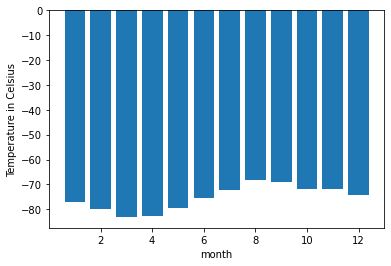

In [52]:
# Plot the average temperature by month
plt.bar(mintempavg.index, mintempavg.values)
plt.ylabel('Temperature in Celsius')
plt.xlabel('month')
plt.show()

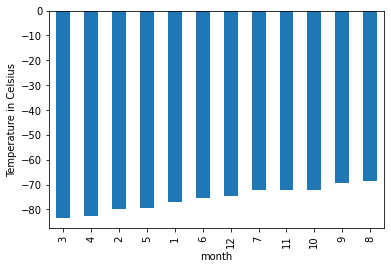

In [62]:
# Identify the coldest and hottest months in Curiosity's location
mintempavg.sort_values().plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.xlabel('month')
plt.show()

In [63]:
# 4. Average pressure by Martian month
pressureavg = marsweather.groupby('month')['pressure'].mean()
pressureavg

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

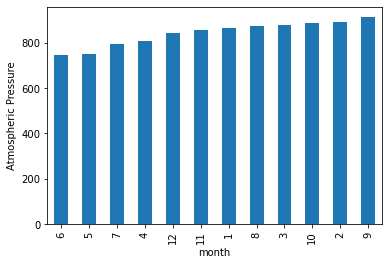

In [64]:
# Plot the average pressure by month
pressureavg.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.xlabel('month')
plt.show()

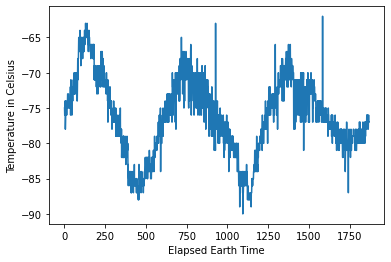

In [98]:
# 5. How many terrestrial (earth) days are there in a Martian year?
marsweather.min_temp.plot()
plt.ylabel('Temperature in Celsius')
plt.xlabel('Elapsed Earth Time')
plt.show()

A year on Mars appears to be about 675 days from the plot, the distance from peak to peak

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [103]:
# Write the data to a CSV
marsweather.to_csv('marsweather.csv', index=False)

In [33]:
browser.quit()